In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 500)

In [2]:
df = pd.read_parquet("../input/train_folds.parquet")

In [3]:
df.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,enc_term,enc_grade,enc_sub_grade,enc_emp_length,enc_home_ownership,enc_verification_status,enc_loan_status,enc_purpose,enc_initial_list_status,enc_application_type,enc_disbursement_method,enc_debt_settlement_flag,kfolds,kfold
0,2000,13.99,23500.0,18.64,0.0,0.0,73.0,7.0,1.0,5168,31.5,18.0,0.0,457.29,0.0,68.15,0.0,0.0,0.0,10682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10332.0,0.0,0.0,170.0,297.0,15.0,15.0,0.0,15.0,16.0,0.0,2.0,7.0,4.0,0.0,0.0,0.0,92.9,1.0,0.0,0,2,13,-1,4,2,1,11,1,0,0,0,-1,3.0
1,35000,16.99,110000.0,20.97,0.0,0.0,NaN,19.0,0.0,42959,59.2,31.0,0.0,7072.63,0.0,22188.00,0.0,0.0,0.0,300257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21541.0,0.0,0.0,98.0,98.0,5.0,5.0,1.0,5.0,7.0,0.0,6.0,18.0,5.0,0.0,0.0,0.0,100.0,0.0,0.0,0,3,17,10,1,2,1,2,0,0,0,0,-1,4.0
2,15000,6.99,70000.0,25.06,0.0,1.0,NaN,14.0,0.0,28690,35.3,35.0,0.0,710.99,0.0,12006.27,0.0,0.0,0.0,59682.0,1.0,2.0,0.0,1.0,15.0,30992.0,4.0,4.0,4309.0,42.0,1.0,0.0,1.0,17888.0,0.0,0.0,106.0,238.0,4.0,4.0,0.0,9.0,4.0,0.0,4.0,15.0,5.0,0.0,0.0,0.0,97.1,0.0,0.0,0,0,1,3,1,0,1,1,0,0,0,0,-1,1.0
3,10500,7.26,56500.0,13.95,0.0,0.0,NaN,11.0,0.0,10917,35.7,17.0,0.0,407.18,0.0,7733.07,0.0,0.0,0.0,29300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13483.0,0.0,0.0,14.0,93.0,5.0,5.0,0.0,5.0,14.0,0.0,6.0,9.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,0,0,3,4,4,1,1,2,1,0,0,0,-1,4.0
4,2000,12.69,26250.0,16.23,0.0,0.0,NaN,6.0,0.0,11634,94.6,19.0,0.0,384.10,0.0,641.17,0.0,0.0,0.0,11634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,666.0,0.0,0.0,NaN,106.0,8.0,8.0,0.0,14.0,9.0,0.0,5.0,17.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0,2,11,1,4,2,1,1,1,0,0,0,-1,3.0


In [5]:
df.isnull().sum()/len(df)

loan_amnt                     0.000000
int_rate                      0.000000
annual_inc                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000002
mths_since_last_delinq        0.490361
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.000585
total_acc                     0.000000
out_prncp                     0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000000
acc_now_delinq                0.000000
tot_coll_amt                  0.000000
tot_cur_bal                   0.000000
open_acc_6m                   0.457279
open_act_il                   0.457278
open_il_12m                   0.457278
open_il_24m                   0.457278
mths_since_rcnt_il            0.470458
total_bal_il             

In [4]:
class FeatureSelection:
    def __init__(self, df: pd.DataFrame, target_col: str) -> None:
        self.dataframe = df
        self.target_col = target_col
        self.cols = self.dataframe.columns
    

    def get_dataframe_details(self, feature_selection_method: str) ->pd.DataFrame:
        """
        feature_selection_method: takes values such 'Missing_Values' and 'Variance' as selection method
        and returns dataframe for the respective method
        """
        if feature_selection_method == "Missing_Values":
            missing_pct = pd.DataFrame(columns=["Missing_Pct"], index=[self.cols])
            for col in self.cols:
                missing_pct.loc[col, "Missing_Pct"] = (self.dataframe[col].isnull().sum())/ len(self.dataframe) * 100
            return missing_pct
        elif feature_selection_method == "Variance":
            variance_df = pd.DataFrame(columns=["Variance"], index=[self.cols])
            for i in self.cols:
                variance_df.loc[i, "Variance"] = (self.dataframe[i].var())
            return variance_df

        else:
            raise Exception("Selection method not understood")

In [5]:
def get_nunique_value_from_categorical_col(df: pd.DataFrame) ->pd.DataFrame:
    cat_cols = df.select_dtypes(include="object").columns
    nunique_cat_vals = pd.DataFrame(columns=["Nunique"], index=[cat_cols])
    for col in cat_cols:
        nunique_cat_vals.loc[col, "Nunique"] = df[col].nunique()
    return nunique_cat_vals

In [6]:
missing_df = FeatureSelection(df=df, target_col='loan_status').get_dataframe_details(feature_selection_method="Missing_Values")

In [7]:
missing_df.tail()

,Missing_Pct
settlement_status,99.633383
settlement_date,99.633383
settlement_amount,99.633383
settlement_percentage,99.633383
settlement_term,99.633383


In [30]:
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default'], dtype=object)

In [ ]:
# f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
# sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
# sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
# f.tight_layout()

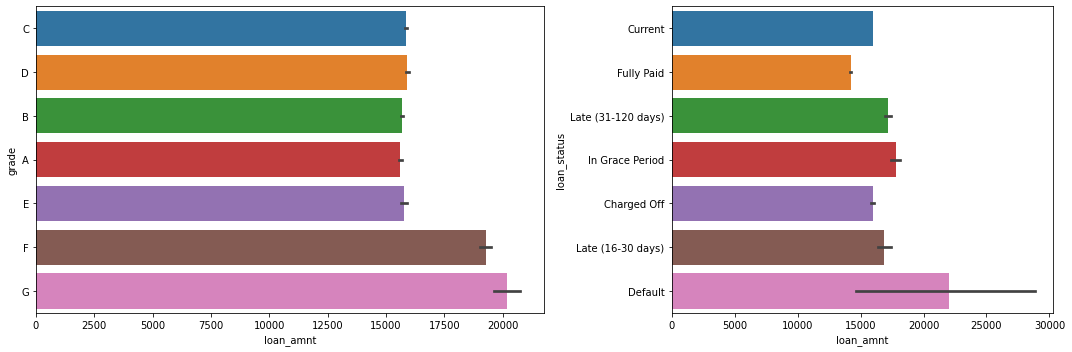

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(data=df, x="loan_amnt", y="grade", ax=axs[0])
sns.barplot(data=df, x="loan_amnt", y="loan_status", ax=axs[1])
fig.tight_layout()

In [ ]:
missing_df.reset_index(inplace=True)
col_to_drop = missing_df[missing_df.Missing_Pct >= 50]['level_0']
df.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
print(get_nunique_value_from_categorical_col(df=df))
cat_cols_to_drop = ["emp_title", "issue_d", "title", "zip_code", "addr_state", "earliest_cr_line", 
                        "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"]

In [ ]:
df.drop(cat_cols_to_drop, axis=1, inplace=True)

In [ ]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

In [ ]:
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
df[cat_cols].dtypes

In [ ]:
def imputer(df: pd.DataFrame) ->pd.DataFrame:
    for c in df.columns:
        if c in df.select_dtypes(include="int").columns:
            df.loc[:, c].fillna(df[c].median(), inplace=True)
        elif c in df.select_dtypes(include='object').columns:
            df.loc[:, c].fillna(df[c].mode()[0], inplace=True)
        return df

In [ ]:
df = imputer(df)
df.isnull().sum()

In [ ]:
dtypes_df = pd.DataFrame(columns=["Dtypes"], index=[df.columns])
for c in df.columns:
    dtypes_df.loc[c, "Dtypes"] = df[c].dtypes

In [ ]:
def lbl_encoding(df: pd.DataFrame) ->pd.DataFrame:
    cat_cols = df.select_dtypes(include="category").columns
    for c in cat_cols:
        df[c] = df[c].cat.codes
    return df

In [ ]:
df = lbl_encoding(df)

In [ ]:
df.loan_status.value_counts().plot(kind="bar")

In [ ]:
num_cols = df.columns[(df.dtypes == "float64") | (df.dtypes == "int64")]

In [ ]:
corr = df[num_cols].corr()

# Select the upper triangle of the correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [ ]:
# Find index of feature columns with correlation greater than a threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot=False)